# EternalBlue Exploit

#### Author: Rifqi Ardia Ramadhan

EternalBlue is a Windows Exploit that exploits SMB version 1 that can carry remote code execution with specially crafted request. Patch was issued in March 2017, but adversaries still can exploit if victim does not update their Windows to the latest version. 

The more technical detail explained [here](https://research.checkpoint.com/2017/eternalblue-everything-know/). This article will only explain about the detection.

This use case will try to detect EternalBlue exploitation via network. The first detection is the use of NT Trans Request with bunch of NOPs. This large NT Trans request will lead to many secondary Trans2 Requests with also large request size. This requests contain malicious code and encrypted payload. Then after the request, Trans2 should respond with `STATUS_INVALID_PARAMETER`, indicating that the overwrite has been successful. To check whether the payload is installed, by searching SMB Multiplex ID == 82. If it exists, then the payload is successfully installed.


## Use Case
### Objective
Identify if there is any suspicious SMB packets that have the characteristic of EternalBlue exploit. This use case will exclusively deals EternalBlue detection using network activity.

### Log Requirements
Network traffic capture.

### Characteristics
| No | Characteristic | Note | Why|
|----|----------------|------|---|
|  1 | Session opened for user `anonymous` to `$IPC` | |Step 1 |
|2   | NT Trans Request with huge payload and lots of NOP's|| Step 2|
|3   | Lots of encrypted Trans2 secondary request|| Step 3, contains shellcode and encrypted payload|
|4   | Trans2 Response will give `STATUS_INVALID_PARAMETER`||Step 4, this indicates the overwrite is successful|
|5   | SMB Multiplex ID = 82|| This is the signature of the successful payload installation|

### References
https://www.mcafee.com/blogs/other-blogs/mcafee-labs/analysis-wannacry-ransomware/

https://www.researchgate.net/publication/332088162_WannaCry_Ransomware_Analysis_of_Infection_Persistence_Recovery_Prevention_and_Propagation_Mechanisms

https://www.hackers-arise.com/post/2018/11/30/network-forensics-part-2-packet-level-analysis-of-the-eternalblue-exploit

https://research.checkpoint.com/2017/eternalblue-everything-know/

https://www.malware-traffic-analysis.net/2017/05/18/index2.html

https://attack.mitre.org/techniques/T1210/

### Sample
Sample was gathered from [malware-traffic-analysis.net](https://www.malware-traffic-analysis.net/2017/05/18/index2.html), submitted by David Szili

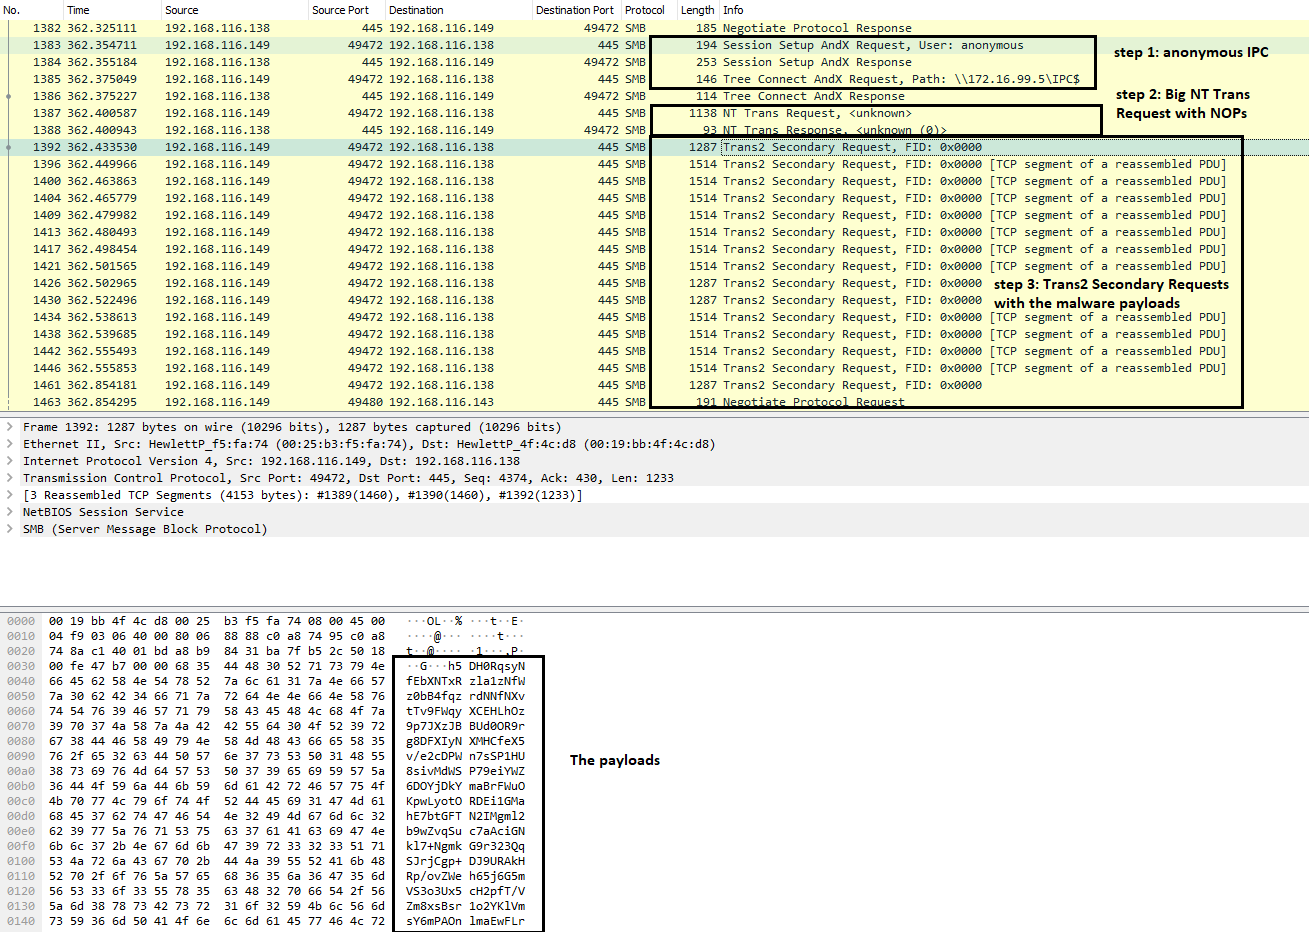

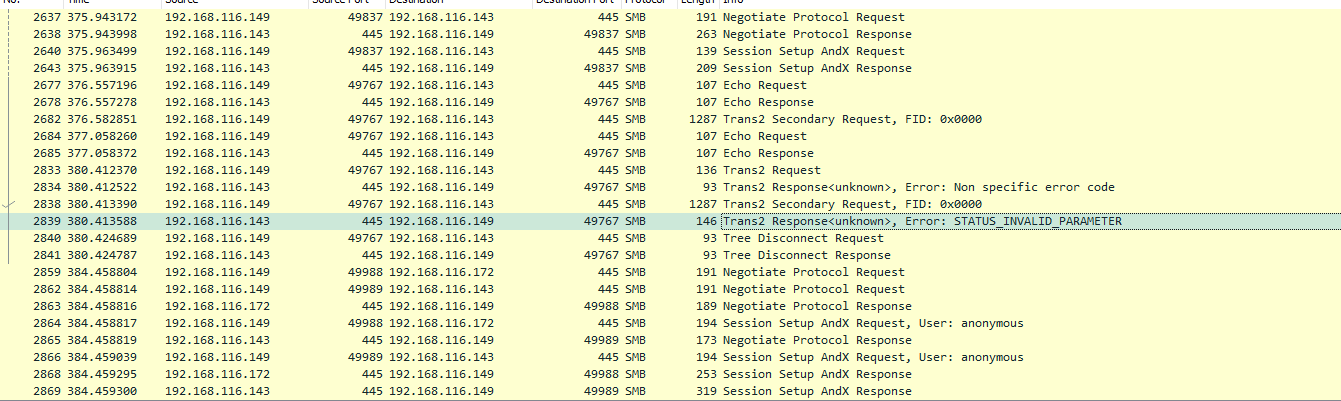

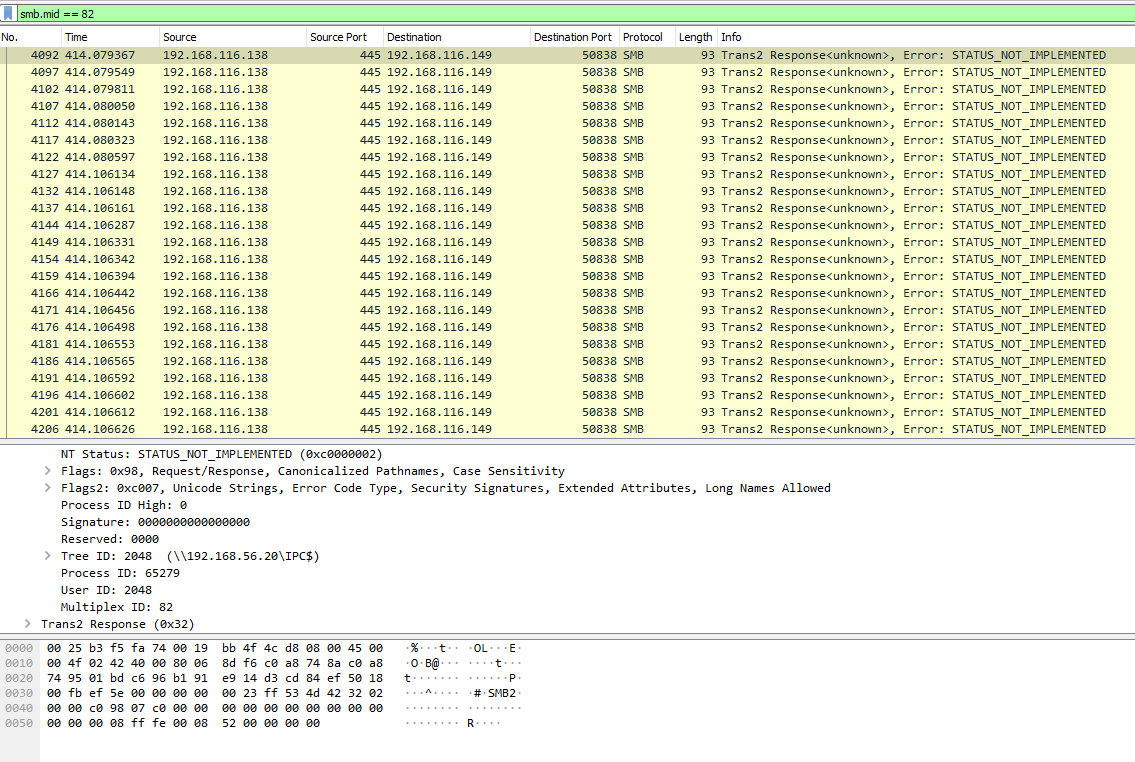